# STA160 Data Science 2021 Spring

# Part3- Data Visualization and Preprocessing

In [1]:
import numpy as np
import pandas as pd

## 1. Visualization- ggplot

The syntax is almost the same to that in R. But we need to bracket the sentence in Python.

In [2]:
from plotnine import *


Bad key "text.kerning_factor" on line 4 in
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40]})
df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


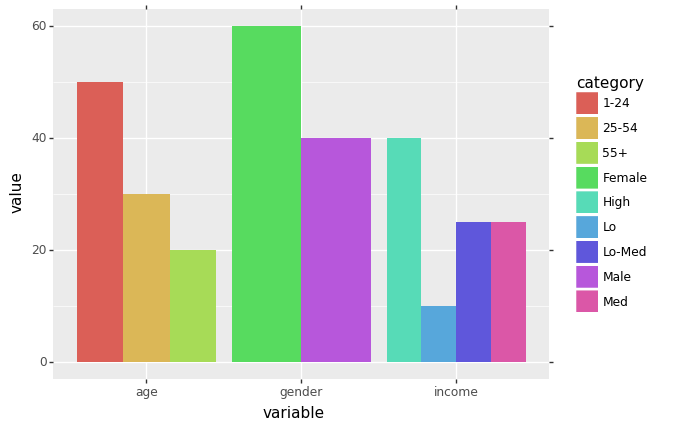

<ggplot: (7013111805)>

In [4]:
(
    ggplot(df, aes(x='variable', y='value', fill='category'))
    + geom_bar(stat='identity', position='dodge')
)

## 2. Visualization- matplotlib

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
#%matplotlib notebook -> will lead to interactive plots embedded within the notebook
#%matplotlib inline   -> will lead to static images of your plot embedded in the notebook
%matplotlib inline

In [7]:
plt.style.use('seaborn-whitegrid')

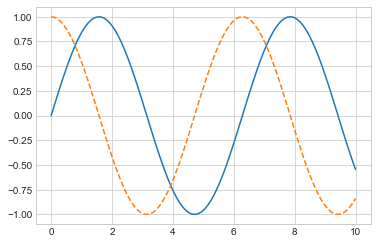

In [8]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

plt.show()

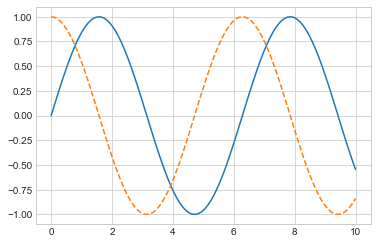

In [9]:
fig

In [10]:
# save figure to files
fig.savefig('my_figure.png')

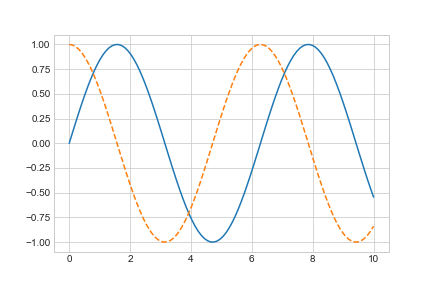

In [11]:
from IPython.display import Image
Image('my_figure.png')

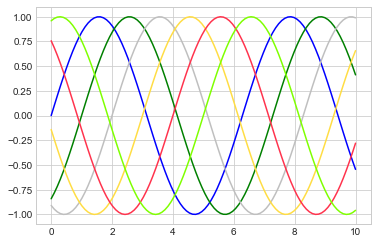

In [12]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

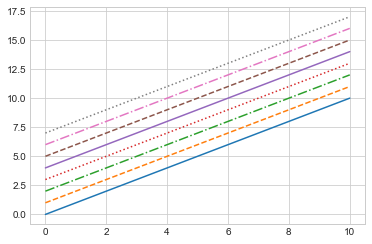

In [13]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

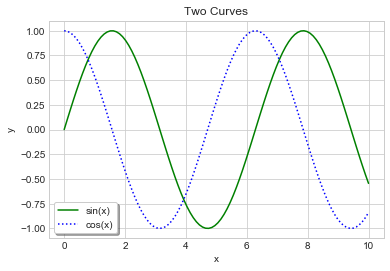

In [14]:
plt.plot(x, np.sin(x), '-g', label='sin(x)') # solid green
plt.plot(x, np.cos(x), ':b', label='cos(x)') # dotted blue
plt.axis('tight')
plt.title("Two Curves")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(frameon=True, shadow=True)

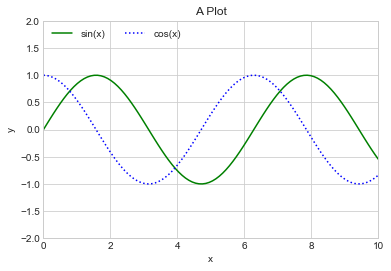

In [15]:
ax = plt.axes()
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='y',title='A Plot')
ax.legend(loc='upper left', ncol=2)

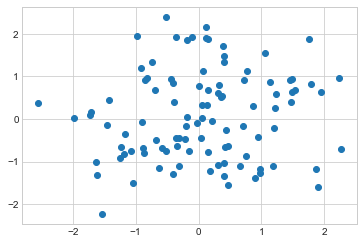

In [16]:
rng = np.random.RandomState(0)
x1 = rng.randn(100) # standard normal
y1 = rng.randn(100) # standard normal
plt.scatter(x1,y1)

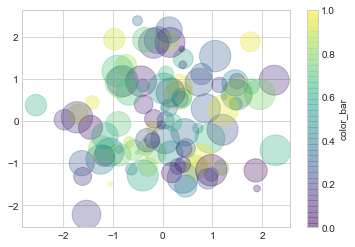

In [17]:
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x1, y1, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(label='color_bar')  # show color scale
plt.clim(0,1) # color bar from 0 to 1

### Multiple Plots

In Matplotlib, the figure (an instance of the class plt.figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 

The axes (an instance of the class plt.axes) is a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. 

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20ed0f60>,
       dtype=object))

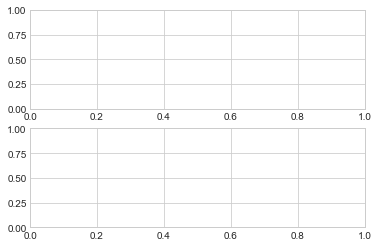

In [18]:
plt.subplots(2)

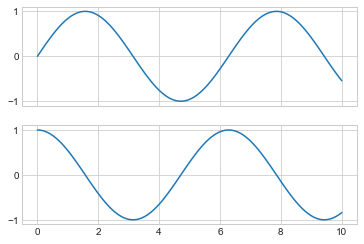

In [19]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[0].set(xticklabels=[])
ax[1].plot(x, np.cos(x))

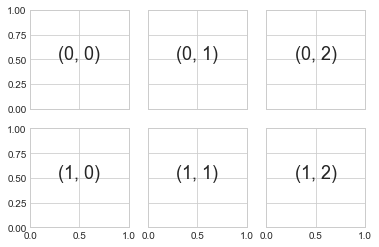

In [20]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')

### 3-D plots

In [21]:
from mpl_toolkits import mplot3d

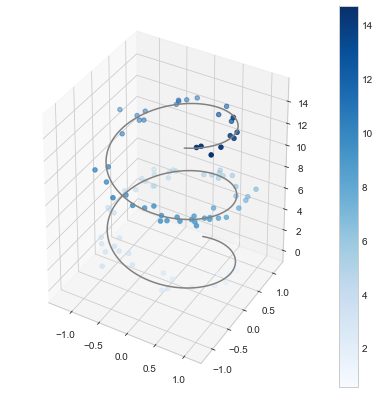

In [22]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
p=ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
fig.colorbar(p);

### Histogram

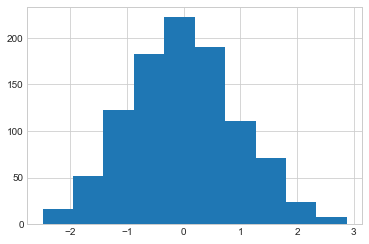

In [23]:
data = np.random.randn(1000)
plt.hist(data);

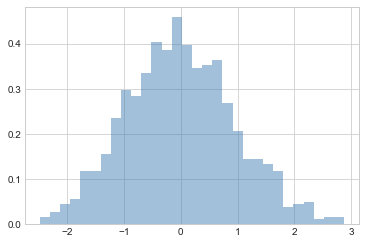

In [24]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor='none');

### Bar plot

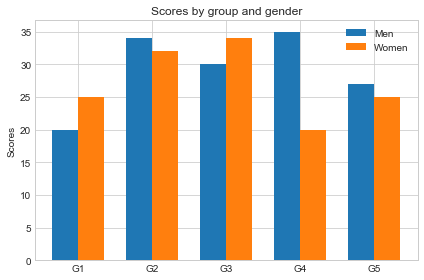

In [25]:
groups = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(groups))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(xticks=x, 
       xticklabels=groups,
       ylabel='Scores',
       title='Scores by group and gender')
ax.legend()
fig.tight_layout()

### read data in Pandas

In [26]:
pd.read_csv?

In [27]:
pd.read_excel?

## Data preprocessing

## A real data example- Titanic data

In [28]:
import seaborn as sns

In [29]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [31]:
titanic.shape

(891, 15)

In [32]:
titanic.isna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [33]:
titanic.isna().any(axis=0)

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [34]:
titanic.isna().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Missing values

### 1. the reason of missing

* Missing completely at random
* Missing at random
* Missing not at random

### 2. remove missing values

Remove a variable if a majority values are missing, eg. 'deck'.

Remove samples if there are only few missing values, eg. 'embarked' and 'embark_town'

In some situation, we don't want to get rid of any information, so we need to impute the missing values, eg. 'age'.


In [35]:
titanic_copy=titanic.copy() # let's copy the dataset
titanic_copy.drop(columns='deck',inplace=True) # drop variable 'deck'

In [36]:
titanic_copy[titanic_copy.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [37]:
titanic_copy=titanic_copy[~titanic_copy.embarked.isna()] # drop two rows

In [38]:
titanic_copy.shape

(889, 14)

In [39]:
titanic_copy.isna().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

### 3. impute missing values

For categorical variables, we can create a new category, say 'unknown', to replace the missing.

For numeric variables or some categorical ones, it refers to Univariate and Multivariate Imputation.

Let's go back to the original Titanic dataset to illustrate the idea.

#### 3.1 Univariate feature imputation

#### a. Pandas fillna

In [40]:
titanic["embarked"][60:65] # original variable

60      C
61    NaN
62      S
63      S
64      C
Name: embarked, dtype: object

In [41]:
titanic["embarked"].fillna("Unknown")[60:65] # filling a null values using 'Unknown'

60          C
61    Unknown
62          S
63          S
64          C
Name: embarked, dtype: object

In [42]:
titanic.age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [43]:
age_median=titanic.age.median()
titanic.age.fillna(age_median)[0:10] # filling a null values using median

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [44]:
# this imputation is simple but stupid- 202 people out of 889 are under age 28
pd.value_counts(titanic.age.fillna(age_median))  # ascending = False (by default)

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 88, dtype: int64

#### b. Sklearn SimpleImputer
Package Sklearn can do exactly the same, and more convinently.

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(titanic[['embarked']]) # fit() for training datasets

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [47]:
# NA is replaced by 'S'
imp.transform(titanic[['embarked']])[60:65] # transform() for training and test data sets

array([['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C']], dtype=object)

In [48]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(titanic[['age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
#  NA is replaced by 28.
imp.transform(titanic[['age']])[0:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.]])

#### 3.2 Multivariate feature imputation

At each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [52]:
titanic_number=titanic.select_dtypes(include=np.number) # only extract numeric columns and do regressions

In [53]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(titanic_number)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [54]:
imp.transform(titanic_number)

array([[ 0.        ,  3.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 1.        ,  3.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 0.        ,  3.        , 23.25968149,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 0.        ,  3.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

Beyong linear regression, more complicated imputation methods can refer to https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed.

In [55]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(titanic_number) # fit & transform

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    , 26.8   ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

Let's continue using KNN imputer 'imputer' and impute 'age' in titanic_copy.

In [56]:
titanic_copy_number=titanic_copy.select_dtypes(include=np.number) # only extract numeric columns and do regressions
# replace numeric variables with imputated values
titanic_copy[titanic_copy_number.columns]=imputer.transform(titanic_copy_number)

In [57]:
titanic_copy.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

### Data types- numeric or category?

In [58]:
titanic_copy.dtypes

survived        float64
pclass          float64
sex              object
age             float64
sibsp           float64
parch           float64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

The data type changes when I impute missing values- some int becomes float. We can cast an object to a particular type.

In [59]:
titanic_copy.survived=titanic_copy.survived.astype('int')
titanic_copy.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

### Numeric variables

A natual question is: when should we consider a numeric variable as nominal or categorical.
For instance, pclass= 1, 2, 3. Is it a variable with order 1, 2, 3 or categories '1', '2', '3'?
Answer: it depends on your goal or your understanding towards to the variable.

Refer to the meaning of Pclass: a proxy for socio-economic status (SES);
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

It looks reasonable to take the ordinal variable in 1, 2, 3, but how about 1, 3, 4 or 1, 2, 4? It seems still okay if applying 'Upper', 'Middle' and 'Lower'.

Another trick is to segment data values into bins or binning, especially when the distribution is extremely skewed. For instance, majority of sibsp and parch are 0, 1, or 2, and only few samples have 4, 5, or 6. We can segment the value into 0, 1, 2, and 3+.

In [60]:
titanic_copy.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.931989,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.578677,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
pd.value_counts(titanic_copy.survived)

0    549
1    340
Name: survived, dtype: int64

In [62]:
pd.value_counts(titanic_copy.pclass)

3.0    491
1.0    214
2.0    184
Name: pclass, dtype: int64

In [63]:
pd.value_counts(titanic_copy.sibsp,ascending=False)

0.0    606
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: sibsp, dtype: int64

In [64]:
pd.value_counts(titanic_copy.parch,ascending=False)

0.0    676
1.0    118
2.0     80
3.0      5
5.0      5
4.0      4
6.0      1
Name: parch, dtype: int64

In [65]:
# Bin values into discrete intervals.
sibsp_bins=pd.cut(titanic_copy.sibsp,[0,1,2,3,10],right=False)
pd.value_counts(sibsp_bins)

[0, 1)     606
[1, 2)     209
[3, 10)     46
[2, 3)      28
Name: sibsp, dtype: int64

In [66]:
# Where `cond` is True, keep the original value. Where False, replace with corresponding value from `other`.
sibsp_replace=titanic_copy.sibsp.where(titanic_copy.sibsp<3,other=3)
pd.value_counts(sibsp_replace)

0.0    606
1.0    209
3.0     46
2.0     28
Name: sibsp, dtype: int64

In [67]:
import numpy as np

a=np.array([1,2,3,4])
np.where(a<2, 0, 3)

array([0, 3, 3, 3])

In [68]:
# Replace values given in `to_replace` with `value`.
parch_replace=titanic_copy.parch.replace(to_replace=[3,4,5,6],value=3)
pd.value_counts(parch_replace)

0.0    676
1.0    118
2.0     80
3.0     15
Name: parch, dtype: int64

In [69]:
titanic_copy.parch.replace?

Histograms for numeric variables.

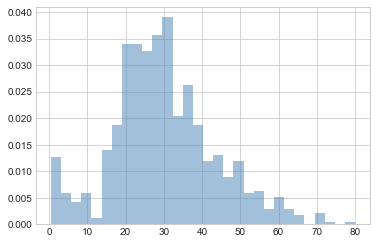

In [70]:
plt.hist(titanic_copy.age, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor='none');

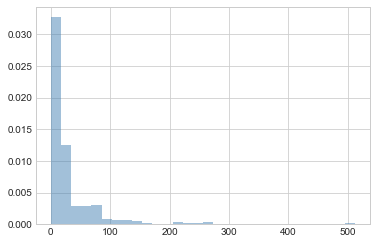

In [71]:
plt.hist(titanic_copy.fare, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor='none');

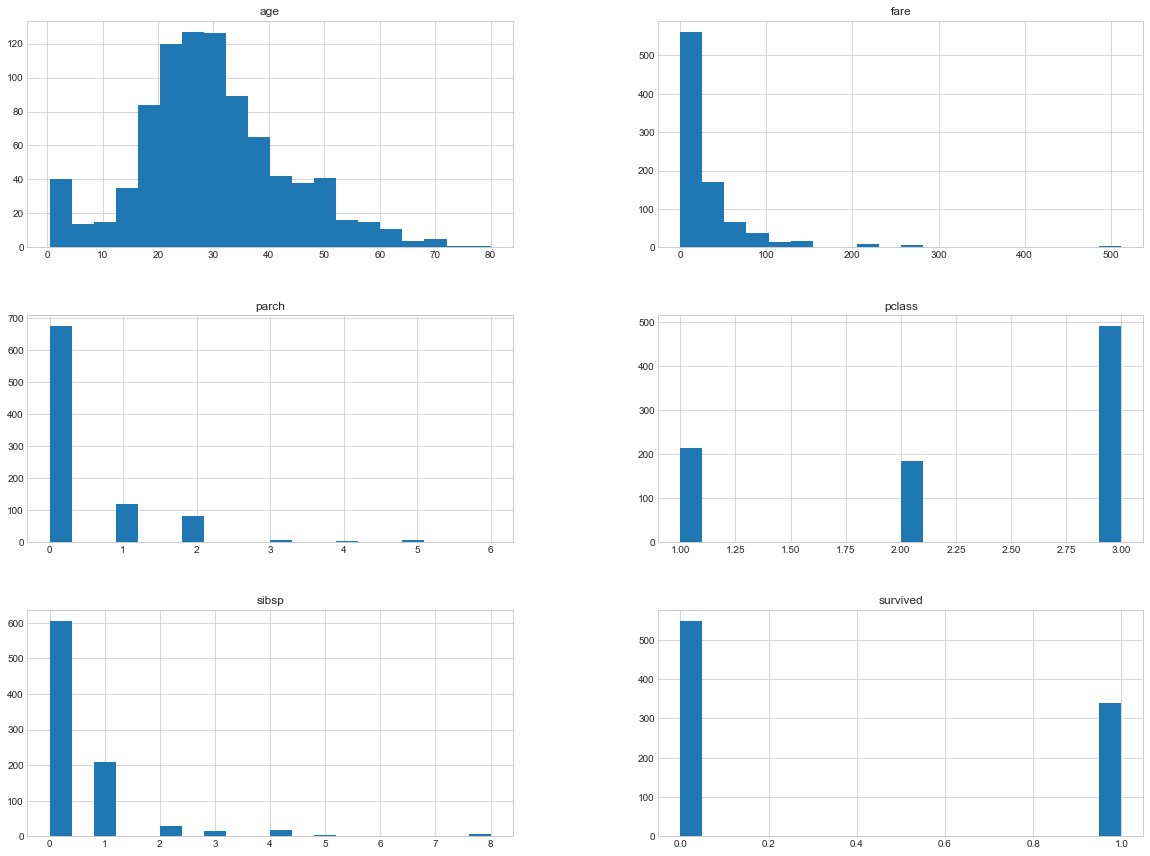

In [72]:
titanic_copy.select_dtypes(include=np.number).hist(bins=20, figsize=(20,15))
plt.show()

### Categorical variables

A question is when and how to combine different categories of a variable. Similar to the analysis for numerical variables, we prefer to merge isolated categories to its neighbors or combine categories with small size into a bigger one. Either way must make sense, but sometimes it is not clear. For instance, when the number of subcategories are extremely large.

Fortunately, we don't need to do any operation in the Titanic data.

In [73]:
titanic_copy.describe(exclude=[np.number])

,sex,embarked,class,who,adult_male,embark_town,alive,alone
count,889,889,889,889,889,889,889,889
unique,2,3,3,3,2,3,2,2
top,male,S,Third,man,True,Southampton,no,True
freq,577,644,491,537,537,644,549,535


In [74]:
pd.value_counts(titanic_copy.sex)

male      577
female    312
Name: sex, dtype: int64

In [75]:
pd.value_counts(titanic_copy.embarked)

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [76]:
pd.value_counts(titanic_copy['class'])

Third     491
First     214
Second    184
Name: class, dtype: int64

In [77]:
pd.value_counts(titanic_copy['who'])

man      537
woman    269
child     83
Name: who, dtype: int64

In [78]:
pd.value_counts(titanic_copy['adult_male'])

True     537
False    352
Name: adult_male, dtype: int64

In [79]:
pd.value_counts(titanic_copy['embark_town'])

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [80]:
pd.value_counts(titanic_copy['alive'])

no     549
yes    340
Name: alive, dtype: int64

In [81]:
pd.value_counts(titanic_copy['alone'])

True     535
False    354
Name: alone, dtype: int64

## Relationship between two or more variables
* 1. Categorical: contingency table
* 2. Numerical: scatterplot
* 3. Categorical v.s Numerical: colored histogram

Some information maybe duplicated or highly associated. Variable survived and alive are just equivalent. If you use alive to predict survived or versa, we call it data leakage. The idea is to remove duplicated variables and try to avoid having highly associated or correlated variables.

In [82]:
pd.crosstab(titanic_copy['survived'], titanic_copy['alive']) # remove either alive or survived

alive,no,yes
survived,,
0,549,0
1,0,340


In [83]:
pd.crosstab(titanic_copy['class'], titanic_copy['pclass']) # remove either one

pclass,1.0,2.0,3.0
class,,,
First,214,0,0
Second,0,184,0
Third,0,0,491


In [84]:
pd.crosstab(titanic_copy['embarked'], titanic_copy['embark_town']) # remove either one

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [85]:
pd.crosstab(titanic_copy['sex'], titanic_copy['who']) # who is more informative

who,child,man,woman
sex,,,
female,43,0,269
male,40,537,0


In [86]:
pd.crosstab(titanic_copy['adult_male'], titanic_copy['who']) # keep who only

who,child,man,woman
adult_male,,,
False,83,0,269
True,0,537,0


'sibsp' and 'parch' seems not related, but they are associated with 'alone'- given 'alone' is True, both 'sibsp' and 'parch' are 0.

In [87]:
titanic_copy.groupby(['alone', 'sibsp', 'parch']).count().sum(1)

alone  sibsp  parch
False  0.0    1.0       418
              2.0       319
              3.0        11
              4.0        11
              5.0        22
       1.0    0.0      1353
              1.0       627
              2.0       209
              3.0        33
              4.0        33
              5.0        33
              6.0        11
       2.0    0.0       176
              1.0        77
              2.0        44
              3.0        11
       3.0    0.0        22
              1.0        77
              2.0        77
       4.0    1.0        99
              2.0        99
       5.0    2.0        55
       8.0    2.0        77
True   0.0    0.0      5885
dtype: int64

In [88]:
titanic_copy.groupby(['alone', 'sibsp', 'parch']).count()

survived  pclass  sex  age  fare  embarked  class  who  \
alone sibsp parch                                                           
False 0.0   1.0          38      38   38   38    38        38     38   38   
            2.0          29      29   29   29    29        29     29   29   
            3.0           1       1    1    1     1         1      1    1   
            4.0           1       1    1    1     1         1      1    1   
            5.0           2       2    2    2     2         2      2    2   
      1.0   0.0         123     123  123  123   123       123    123  123   
            1.0          57      57   57   57    57        57     57   57   
            2.0          19      19   19   19    19        19     19   19   
            3.0           3       3    3    3     3         3      3    3   
            4.0           3       3    3    3     3         3      3    3   
            5.0           3       3    3    3     3         3      3    3   
            6.0           1       1    1    1     1         1      1    1   
      2.0   0.0          16      16   16   16    16        16     16   16   
            1.0           7       7    7    7     7         7      7    7   
            2.0           4       4    4    4     4         4      4    4   
            3.0           1       1    1    1     1         1      1    1   
      3.0   0.0           2       2    2    2     2         2      2    2   
            1.0           7       7    7    7     7         7      7    7   
            2.0           7       7    7    7     7         7      7    7   
      4.0   1.0           9       9    9    9     9         9      9    9   
            2.0           9       9    9    9     9         9      9    9   
      5.0   2.0           5       5    5    5     5         5      5    5   
      8.0   2.0           7       7    7    7     7         7      7    7   
True  0.0   0.0         535     535  535  535   535       535    535  535   

                   adult_male  embark_town  alive  
alone sibsp parch                                  
False 0.0   1.0            38           38     38  
            2.0            29           29     29  
            3.0             1            1      1  
            4.0             1            1      1  
            5.0             2            2      2  
      1.0   0.0           123          123    123  
            1.0            57           57     57  
            2.0            19           19     19  
            3.0             3            3      3  
            4.0             3            3      3  
            5.0             3            3      3  
            6.0             1            1      1  
      2.0   0.0            16           16     16  
            1.0             7            7      7  
            2.0             4            4      4  
            3.0             1            1      1  
      3.0   0.0             2            2      2  
            1.0             7            7      7  
            2.0             7            7      7  
      4.0   1.0             9            9      9  
            2.0             9            9      9  
      5.0   2.0             5            5      5  
      8.0   2.0             7            7      7  
True  0.0   0.0           535          535    535

how sex affacts the survival rate

In [89]:
titanic_copy.groupby('who')[['survived']].mean()

,survived
who,
child,0.590361
man,0.163873
woman,0.754647


how sex + class affact the survival rate

In [90]:
titanic_copy.groupby(['who', 'pclass'])[['survived']].aggregate(['mean','count'])

survived      
                  mean count
who   pclass                
child 1.0     0.833333     6
      2.0     1.000000    19
      3.0     0.431034    58
man   1.0     0.352941   119
      2.0     0.080808    99
      3.0     0.119122   319
woman 1.0     0.977528    89
      2.0     0.909091    66
      3.0     0.491228   114

In [91]:
titanic_copy.groupby(['pclass'])[['fare']].aggregate(['mean','std'])

fare           
             mean        std
pclass                      
1.0     84.193516  78.746457
2.0     20.662183  13.417399
3.0     13.675550  11.778142

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


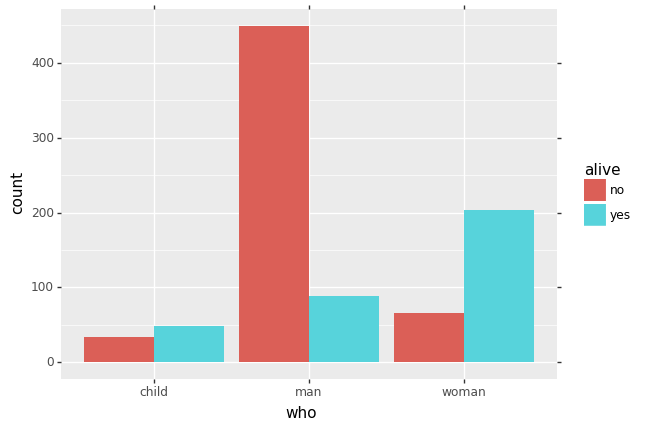

<ggplot: (-9223372029839771753)>

In [92]:
(
    ggplot(titanic_copy,aes(x ='who',fill='alive')) 
    +geom_bar(position='dodge')
)

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


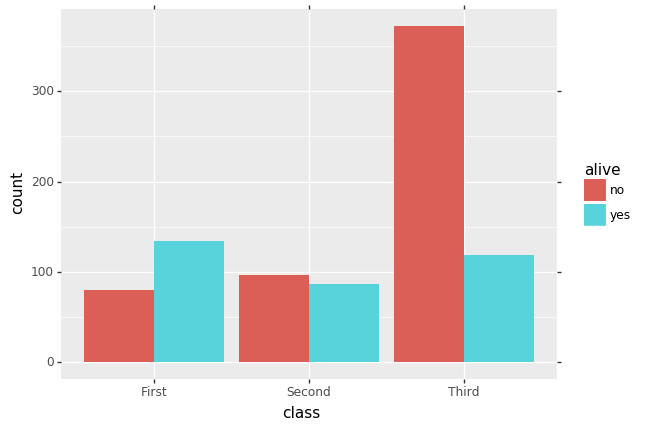

<ggplot: (-9223372029839775193)>

In [93]:
(
    ggplot(titanic_copy,aes(x ='class',fill='alive')) 
    +geom_bar(position='dodge')
)

Colored Histograms

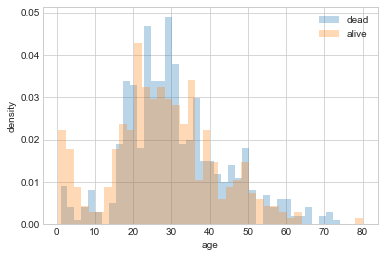

In [94]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(titanic_copy.age[titanic.survived==0], **kwargs, label='dead')
plt.hist(titanic_copy.age[titanic.survived==1], **kwargs, label='alive')
plt.xlabel("age")
plt.ylabel("density")
plt.legend();

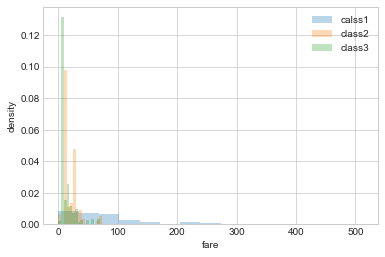

In [95]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=15)

plt.hist(titanic_copy.fare[titanic.pclass==1], **kwargs, label='calss1')
plt.hist(titanic_copy.fare[titanic.pclass==2], **kwargs, label='class2')
plt.hist(titanic_copy.fare[titanic.pclass==3], **kwargs, label='class3')
plt.xlabel("fare")
plt.ylabel("density")
plt.legend();

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


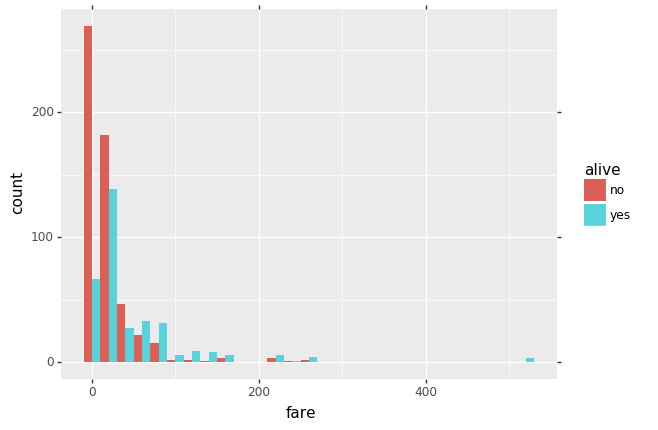

<ggplot: (-9223372029837902718)>

In [96]:
(
ggplot(titanic_copy, aes(x='fare',fill='alive'))
 + geom_histogram(binwidth=20,position="dodge")
)    

Scatter Plot

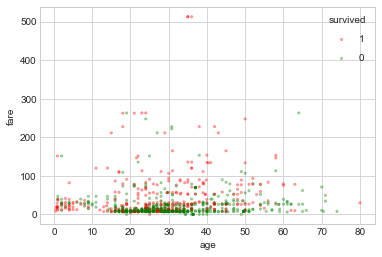

In [97]:
col=titanic_copy.survived.copy()
col[titanic_copy.survived==1]='red'
col[titanic_copy.survived==0]='green'

plt.figure()
plt.scatter(titanic_copy.age, titanic_copy.fare, c=col, alpha=0.3, s=5)
plt.xlabel("age")
plt.ylabel("fare")

# Here we create a legend: we'll plot empty lists with the desired size and label
plt.scatter([], [], c='red', alpha=0.3, s=5, label='1')
plt.scatter([], [], c='green', alpha=0.3, s=5, label='0')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='survived');

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


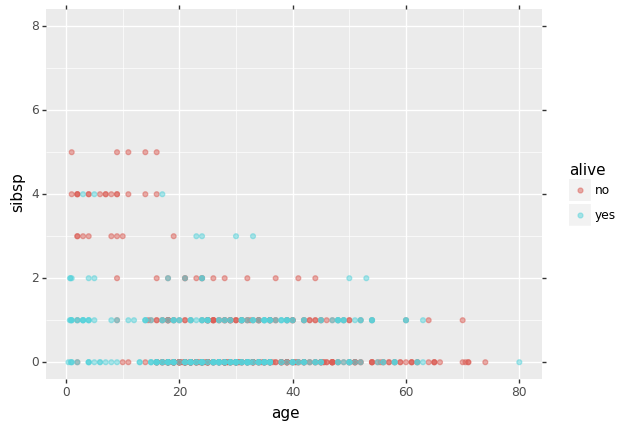

<ggplot: (7016985769)>

In [98]:
(
ggplot(titanic,aes(x='age',y='sibsp',color='alive'))
    +geom_point(alpha=0.5)
)

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


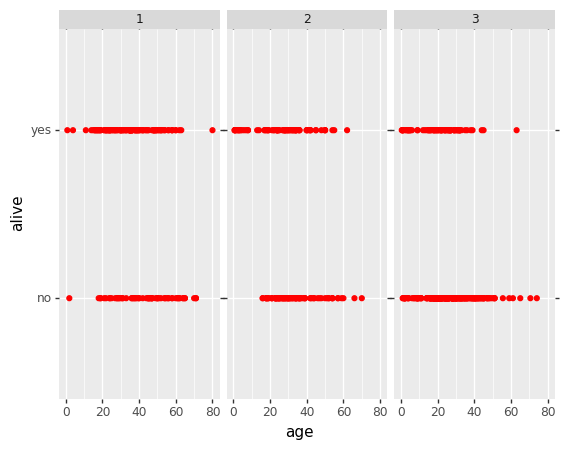

<ggplot: (-9223372029837636892)>

In [99]:
(
ggplot(titanic,aes(x='age',y='alive'))
    +geom_point(color='red')
    +facet_wrap('pclass')
)

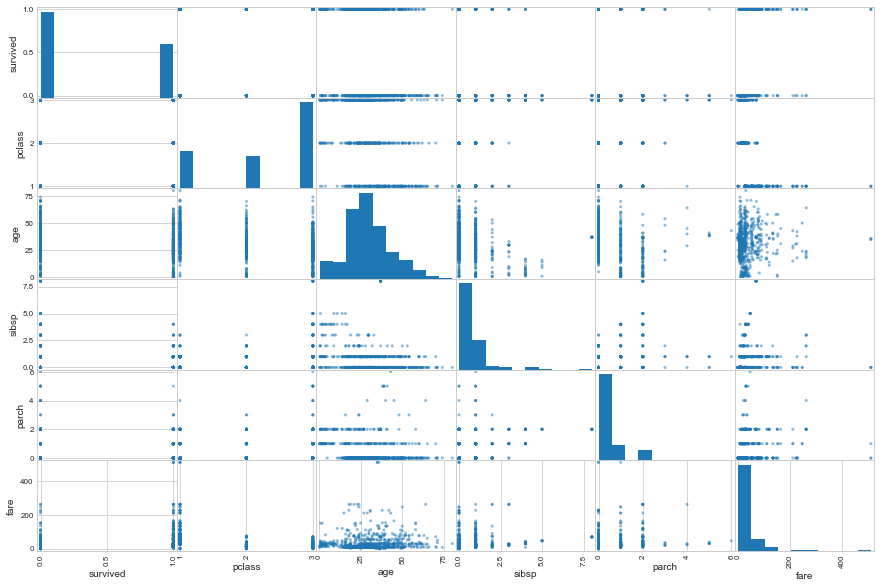

In [100]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_copy.select_dtypes(include=np.number), figsize=(15,10));

In [101]:
titanic_copy.select_dtypes(include=np.number).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.335549,-0.109039,-0.034040,0.083151,0.255290
pclass,-0.335549,1.000000,-0.364120,0.081656,0.016824,-0.548193
age,-0.109039,-0.364120,1.000000,-0.208704,-0.180533,0.092737
sibsp,-0.034040,0.081656,-0.208704,1.000000,0.414542,0.160887
parch,0.083151,0.016824,-0.180533,0.414542,1.000000,0.217532
fare,0.255290,-0.548193,0.092737,0.160887,0.217532,1.000000


### Feature Scaling

Many Machine Learning algorithems don't perform well when the input numerical predictors have very different scales. For exaple, Euclidian distance may be required to calculated (eg. Clustering, KNN), but it is very sensitive the feature scales.

__Min-max__:
A feature is shifted and scaled so that it ends up ranging from 0 to 1.

In [102]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(feature_range=(0, 1))
age_scale=scal.fit_transform(titanic_copy[['age']])

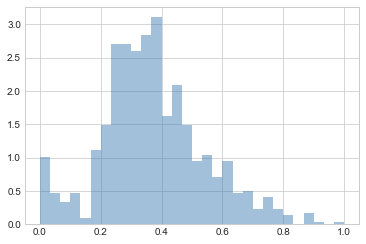

In [103]:
plt.hist(age_scale, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor='none');

__Standardization__ :
A feature substract its mean and divided by its standard deviation.

In [104]:
from sklearn.preprocessing import StandardScaler
scal2=StandardScaler()
age_scale2=scal2.fit_transform(titanic_copy[['age']])

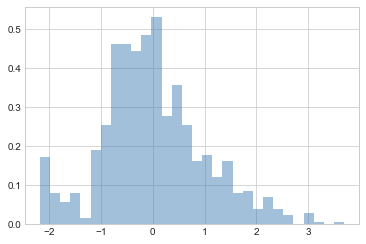

In [105]:
plt.hist(age_scale2, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor='none');

### One-hot coding (dummy variables)
Encode categorical features as a one-hot numeric array.

In [106]:
from sklearn.preprocessing import OneHotEncoder
# Drop one of the categories per feature. 
# This is useful in situations where perfectly collinear features cause problems
enc = OneHotEncoder(drop='first')
enc.fit(titanic_copy[['who','pclass']])
enc.categories_  # 'who' + 'pclass'
# totally, we have 4= 2 + 2 dummy variables

[array(['child', 'man', 'woman'], dtype=object), array([1., 2., 3.])]

In [107]:
# it returns a SciPy sparse matrix; convert it to NumPy Array via toarray()
enc.transform(titanic_copy[['who','pclass']]).toarray()

array([[1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.]])

In [108]:
# inverse back to original categories
enc.inverse_transform([[0, 0, 0, 0], [1, 0, 0, 1], [0, 1, 1, 0]])

array([['child', 1.0],
       ['man', 3.0],
       ['woman', 2.0]], dtype=object)